## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Homework 5 Matplotlib_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "Resources/Homework 5 Matplotlib_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mouse=len(merge_df["Mouse ID"].unique())
print(f"There are {num_mouse} in the DataFrame")


There are 249 in the DataFrame


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicates[["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge=merge_df.loc[merge_df["Mouse ID"] != "g989"]


In [6]:
# Checking the number of mice in the clean DataFrame.
mouses=len(clean_merge["Mouse ID"].unique())
print(f"There are {mouses} mouses in the clean DataFrame")

There are 248 mouses in the clean DataFrame


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_merge_mean=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
clean_merge_median=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
clean_merge_var=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
clean_merge_sd=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
clean_merge_sem=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_table=pd.DataFrame({"Mean":clean_merge_mean,"Median":clean_merge_median,"Variance":clean_merge_var,"Standar Deviation":clean_merge_sd,"SEM":clean_merge_sem})
summary_table.head()

,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summ_table=clean_merge.groupby("Drug Regimen").agg(
    Mean=("Tumor Volume (mm3)","mean"),
    Median=("Tumor Volume (mm3)","median"),
    Variance=("Tumor Volume (mm3)","var"),
    StandardDeviation = ("Tumor Volume (mm3)","std"),
    SEM = ("Tumor Volume (mm3)","sem"))

summ_table.head()



,Mean,Median,Variance,StandardDeviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

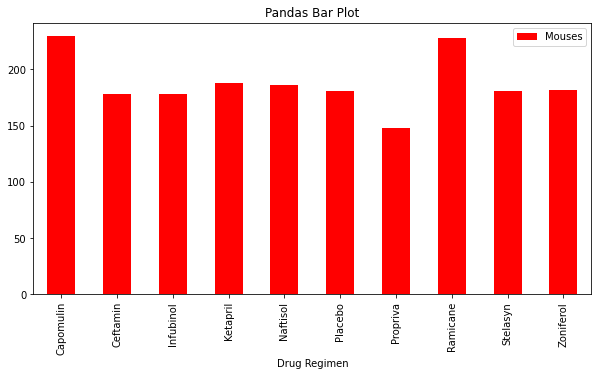

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
values=clean_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
x_axis=np.arange(len(values))
values.plot(kind="bar",y=values,color="r",title="Pandas Bar Plot",figsize=(10,5), align="center", label="Mouses")
plt.legend(loc="best")

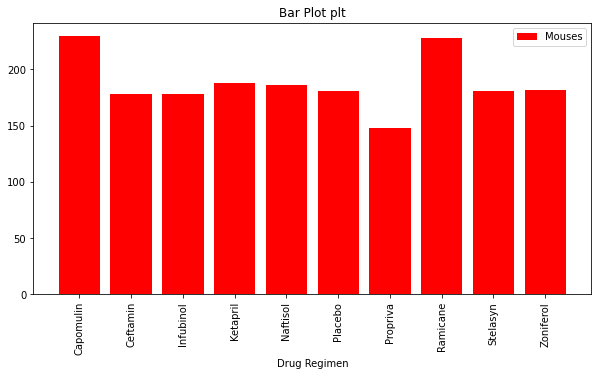

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
thick_locations=[]
tick_locations = [value for value in x_axis]


plt.figure(figsize=(10,5))
handle=plt.bar(x_axis,values,color="r",align="center",label="Mouses")
plt.xticks(tick_locations, clean_merge.groupby("Drug Regimen").count().index,rotation="vertical")

plt.xlabel("Drug Regimen")
plt.title("Bar Plot plt")
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Pie Chart pandas'}>

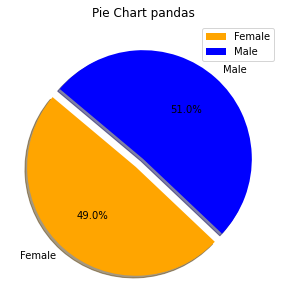

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_values=clean_merge.groupby("Sex")["Tumor Volume (mm3)"].count()
labels=["Female","Male"]
colors=["orange","blue"]
explode=(0.1,0)

pie_values.plot(kind="pie",autopct='%1.1f%%',explode=explode,startangle=140,figsize=(10,5),ylabel="",legend=True, colors=colors,shadow=True, title="Pie Chart pandas")

([<matplotlib.patches.Wedge at 0x1beee9a5790>,
 [Text(-0.79864235783093, -0.8956396509078041, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.46587470873470915, -0.5224564630295523, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

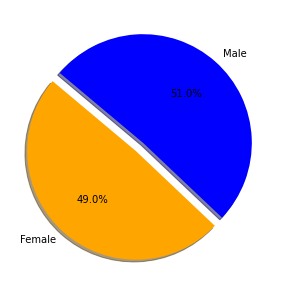

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,5))
plt.pie(pie_values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
